In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('../data/basedata/train.csv')

X_train, X_val, y_train, y_val = train_test_split(np.array(train_data.iloc[:,1:]),
                                    np.array(train_data.iloc[:,0]),
                                    test_size=0.2,
                                    random_state=0)

In [3]:
max_est = 10
oob_score = []

for i in range(1, max_est):
    model = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=0)
    model.fit(X_train, y_train)
    oob_score.append(1 - model.oob_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:452: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:457: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:452: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:457: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:452: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

Text(0, 0.5, 'Out-of-Bag Error')

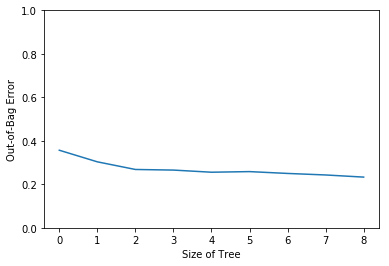

In [4]:
plt.plot(np.array(oob_score))

plt.ylim(0,1)
plt.xlabel('Size of Tree')
plt.ylabel('Out-of-Bag Error')

In [5]:
# おまけ：feature importance

col = np.array(train_data.iloc[:,1:].columns).reshape(-1,1)
feature_imp = model.feature_importances_.reshape(-1,1)
feature_df = pd.DataFrame(np.concatenate([col, feature_imp],axis=1), columns=['feature','importance'])


In [6]:
feature_df.sort_values('importance')[::-1]

,feature,importance
0,Age,0.264782
1,Fare,0.218601
7,Sex_male,0.1826
6,Sex_female,0.127206
4,Pclass_3.0,0.0578279
2,Pclass_1.0,0.0248566
3,Pclass_2.0,0.0170829
17,Parch_0.0,0.0149848
9,SibSp_0.0,0.0136123
10,SibSp_1.0,0.0125165
